#### Model Training - Logistic Regression (Original Dataset Features)

Logistic regression is the chosen algorithm for predicting the presence of cardiovascular disease. This is because logistic regression is designed for binary classification problems and the target of this model is binary. In terms of data types, a logistic regression algorithm can handle continuous and categorical features. 

Below will depict the design and fitting of a Logistic regression model to predict the prescence of cardiovascular disease. 

| Binary | Presence of Disease |
| --- | --- |
| 0 | not present |
| 1 | present |

#####  Load required dependencies

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.linear_model import LogisticRegression
import pickle

##### Import and Visualise data (original dataset)

In [6]:
# Load the dataset
data_frame = pd.read_csv('2.3.2.training_data.csv')
data_frame = pd.DataFrame({
    'cardio': data_frame['cardio'],
    'age': data_frame['age'],
    'height': data_frame['height'],
    'weight': data_frame['weight'],
    'ap_hi': data_frame['ap_hi'],
    'ap_lo': data_frame['ap_lo'],
    'cholesterol': data_frame['cholesterol'],
    'gluc': data_frame['gluc'],
    'smoke': data_frame['smoke'],
    'alco': data_frame['alco'],
})

##### Plot the data (Original Dataset) 

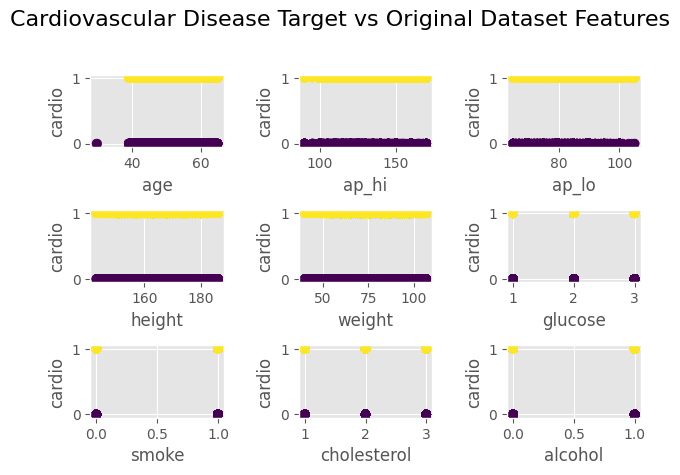

In [7]:
fig,ax = plt.subplots(3,3)

ax[0,0].scatter(data_frame.age, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[0,0].set_xlabel("age")
ax[0,0].set_ylabel("cardio")

ax[1,0].scatter(data_frame.height, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[1,0].set_xlabel("height")
ax[1,0].set_ylabel("cardio")

ax[1,1].scatter(data_frame.weight, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[1,1].set_xlabel("weight")
ax[1,1].set_ylabel("cardio")

ax[0,1].scatter(data_frame.ap_hi, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[0,1].set_xlabel("ap_hi")
ax[0,1].set_ylabel("cardio")

ax[0,2].scatter(data_frame.ap_lo, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[0,2].set_xlabel("ap_lo")
ax[0,2].set_ylabel("cardio")

ax[2,1].scatter(data_frame.cholesterol, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[2,1].set_xlabel("cholesterol")
ax[2,1].set_ylabel("cardio")

ax[1,2].scatter(data_frame.gluc, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[1,2].set_xlabel("glucose")
ax[1,2].set_ylabel("cardio")

ax[2,0].scatter(data_frame.smoke, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[2,0].set_xlabel("smoke")
ax[2,0].set_ylabel("cardio")

ax[2,2].scatter(data_frame.alco, data_frame.cardio, s=40, c=data_frame['cardio'])
ax[2,2].set_xlabel("alcohol")
ax[2,2].set_ylabel("cardio")




fig.suptitle("Cardiovascular Disease Target vs Original Dataset Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title and labels
plt.show()

##### Store Strongest Features and Target

In [8]:
# Features variable
x_cardio = data_frame[['cholesterol', 'weight']]
# Target variable
y_cardio = data_frame['cardio']

data_frame.head()

,cardio,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
0,1,61.661875,156,76.0,120,80,1,1,0,0
1,0,51.868583,170,70.0,130,80,1,1,0,0
2,0,48.788501,166,76.0,120,90,1,1,0,0
3,0,51.986311,151,52.0,130,80,1,1,0,0
4,1,47.430527,152,60.0,140,90,1,1,0,0


##### Instantiate Logistic Regression Object 

In [9]:
cardio_regression = LogisticRegression()

##### Fitting the Model 

In [10]:
cardio_regression.fit(x_cardio, y_cardio)

LogisticRegression()

##### Predict Probability

In [11]:
#Predict the probabilities for the whole dataset
cardio_probabilities = cardio_regression.predict_proba(x_cardio)
# Print the predicted probabilities
print(cardio_probabilities)

[[0.54229552 0.45770448]
 [0.57745862 0.42254138]
 [0.54229552 0.45770448]
 ...
 [0.56580655 0.43419345]
 [0.37282525 0.62717475]
 [0.42991973 0.57008027]]


##### Plot Predictions (Using Original Dataset Features)

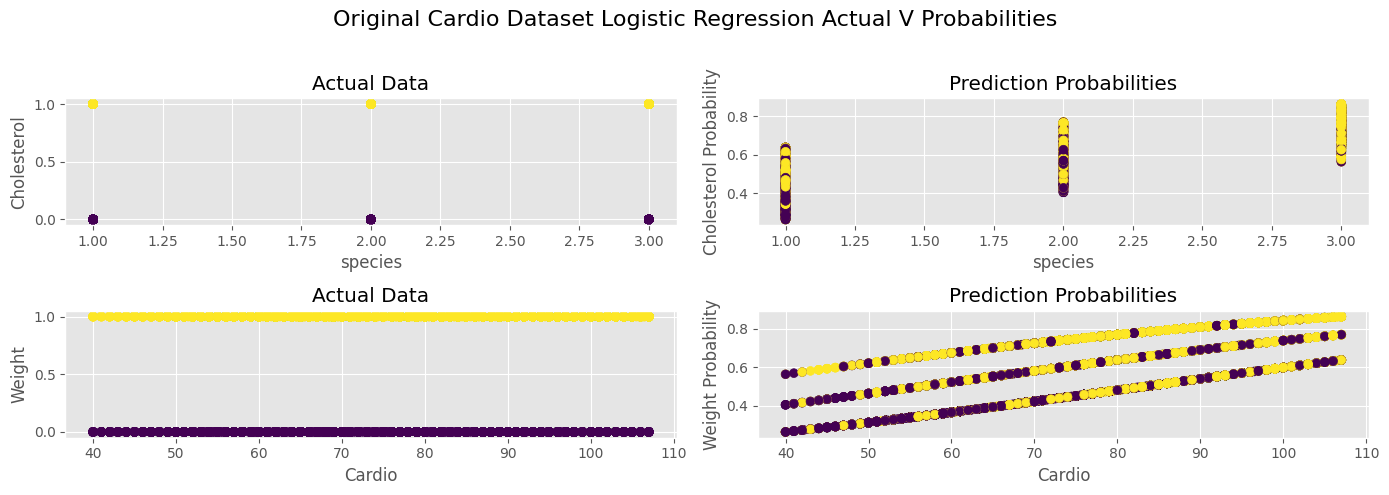

In [12]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(2, 2, figsize=(14, 5))

axs[0,0].scatter(data_frame.cholesterol, data_frame.cardio, s=40, c=data_frame['cardio'])
axs[0,0].set_title("Actual Data")
axs[0,0].set_xlabel("species")
axs[0,0].set_ylabel("Cholesterol")

axs[0,1].scatter(data_frame.cholesterol, cardio_probabilities[:, 1], s=40, c=data_frame['cardio'])
axs[0,1].set_title("Prediction Probabilities")
axs[0,1].set_xlabel("species")
axs[0,1].set_ylabel("Cholesterol Probability")

axs[1,0].scatter(data_frame.weight, data_frame.cardio, s=40, c=data_frame['cardio'])
axs[1,0].set_title("Actual Data")
axs[1,0].set_xlabel("Cardio")
axs[1,0].set_ylabel("Weight")

axs[1,1].scatter(data_frame.weight, cardio_probabilities[:, 1], s=40, c=data_frame['cardio'])
axs[1,1].set_title("Prediction Probabilities")
axs[1,1].set_xlabel("Cardio")
axs[1,1].set_ylabel("Weight Probability")
fig.suptitle("Original Cardio Dataset Logistic Regression Actual V Probabilities", fontsize=16)  # Add a title to the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title and labels
plt.show()

##### Model Evaluation - Loss and Cost of Original Dataset

In [13]:
mae = mean_absolute_error(y_true= y_cardio,y_pred=cardio_probabilities[:, 1]) 
mse = mean_squared_error(y_true=y_cardio,y_pred=cardio_probabilities[:, 1])
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Calculate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_cardio,
    'Predicted result': cardio_probabilities[:, 1],
    'Loss': abs(y_cardio - cardio_regression.predict(x_cardio).round(2))
})
model_loss["Predicted result"] = model_loss["Predicted result"].round(0)
model_loss["Loss"] = model_loss["Loss"].abs()
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])

print(f"The cost of this model is  {model_cost:.5f}")
print(f"The model predicted incorrectly {model_loss['Loss'].sum()} times out of {model_loss.shape[0]} predictions")
print(model_loss)

MAE: 0.46732442704705923
MSE: 0.23364363465257118

The cost of this model is  0.00001
The model predicted incorrectly 18513 times out of 46878 predictions
       Target  Predicted result  Loss
0           1               0.0     1
1           0               0.0     0
2           0               0.0     0
3           0               0.0     0
4           1               0.0     1
...       ...               ...   ...
46873       1               1.0     0
46874       0               0.0     0
46875       1               0.0     1
46876       0               1.0     1
46877       0               1.0     1

[46878 rows x 3 columns]


##### Save the Model 

In [14]:
filename = 'my_saved_model_original_dataset.sav'
pickle.dump(cardio_regression, open('../2.4.Model_Testing_and_Validation/' + filename, 'wb'))